In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/master/studytime.csv")
df["day of week"] = pd.Categorical(df["day of week"], categories=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"], ordered=True)


In [4]:
df

,term,week,day of week,class,time spent (min)
0,fa23,5,Monday,PHYS 214,0.0
1,fa23,5,Monday,MATH 241,60.0
2,fa23,5,Monday,LAS 101,0.0
3,fa23,5,Monday,STAT 107,0.0
4,fa23,5,Tuesday,LAS 101,0.0
...,...,...,...,...,...
1237,fa24,11,Sunday,ASTR 310,0.0
1238,fa24,11,Sunday,CHEM 102,105.0
1239,fa24,11,Sunday,GEOL 208,0.0
1240,fa24,11,Sunday,IS 477,75.0


/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_94651/4015013466.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2 = df[df['term'] == 'sp24'].groupby(['day of week', 'class', 'term']).agg('mean').reset_index()[['day of week', 'class', 'time spent (min)']]


<Axes: xlabel='day of week', ylabel='time spent (min)'>

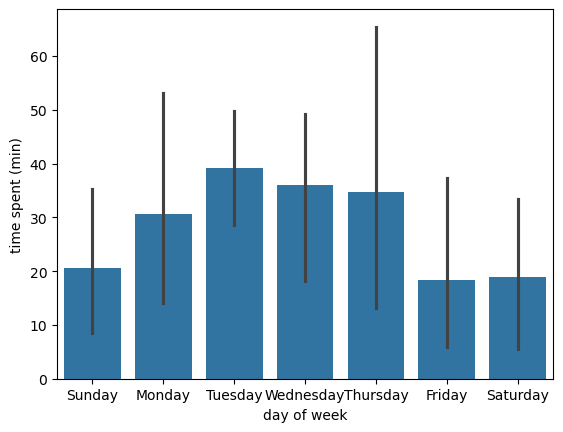

In [5]:
df2 = df[df['term'] == 'sp24'].groupby(['day of week', 'class', 'term']).agg('mean').reset_index()[['day of week', 'class', 'time spent (min)']]
sns.barplot(df2, x='day of week', y='time spent (min)')

In [21]:
df[df['term'] == 'fa24'][['week', 'day of week', 'time spent (min)']].groupby(["day of week", "week"]).agg('sum').reset_index()[['day of week', 'time spent (min)']].groupby('day of week').agg('mean')

/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_94651/739961838.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['term'] == 'fa24'][['week', 'day of week', 'time spent (min)']].groupby(["day of week", "week"]).agg('sum').reset_index()[['day of week', 'time spent (min)']].groupby('day of week').agg('mean')
/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_94651/739961838.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['term'] == 'fa24'][['week', 'day of week', 'time spent (min)']].groupby(["day of week", "week"]).agg('sum').reset_index()[['day of week', 'time spent (min)'

,time spent (min)
day of week,
Sunday,161.818182
Monday,104.090909
Tuesday,115.909091
Wednesday,140.454545
Thursday,69.545455
Friday,28.636364
Saturday,84.545455


/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_94651/3708121571.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,0].set_xticklabels(labels=ax[0,0].get_xticklabels(), rotation=30)


[Text(0, 0, 'ACES 179'),
 Text(1, 0, 'ASTR 310'),
 Text(2, 0, 'CHEM 102'),
 Text(3, 0, 'CHEM 103'),
 Text(4, 0, 'GEOL 208'),
 Text(5, 0, 'IS 477')]

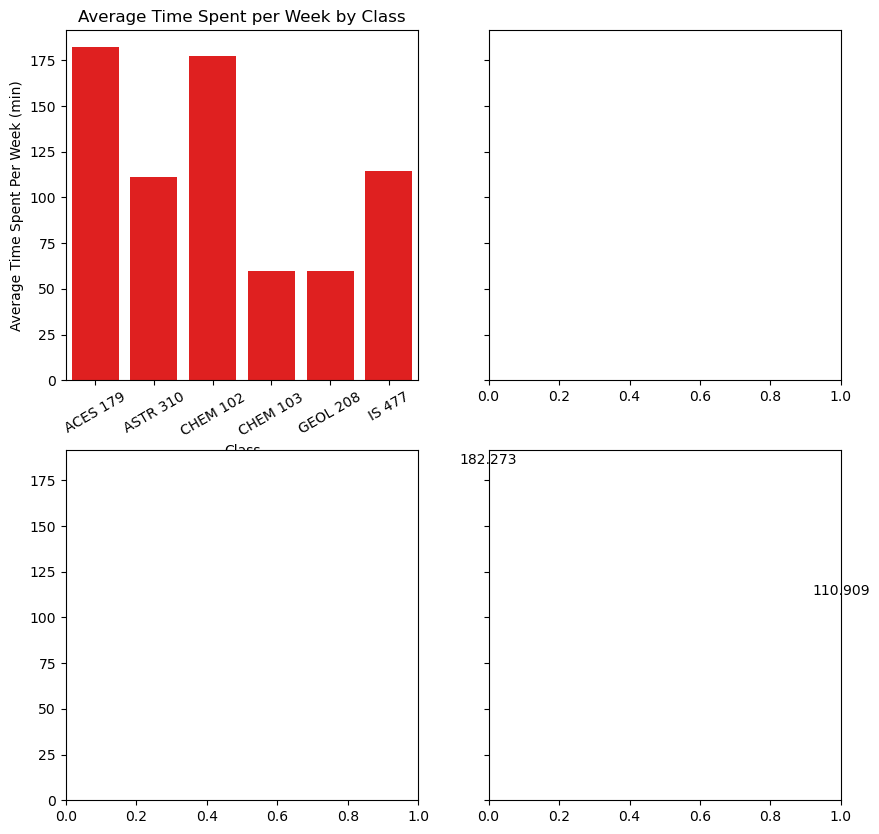

In [53]:
fig, ax = plt.subplots(2,2, figsize=[10,10], sharey=True)

ave = df[df['term'] == 'fa24'][['week', 'class', 'time spent (min)']].groupby(["week", 'class']).agg('sum').reset_index()[['class', 'time spent (min)']].groupby("class").agg('mean')

sns.barplot(ave.reset_index(), x='class', y='time spent (min)', errorbar=('ci', False), color='red', ax=ax[0,0])
ax[0,0].set_xlabel("Class")
ax[0,0].set_ylabel("Average Time Spent Per Week (min)")
ax[0,0].set_title("Average Time Spent per Week by Class")
plt.bar_label(ax[0,0].containers[0])
ax[0,0].set_xticklabels(labels=ax[0,0].get_xticklabels(), rotation=30)